In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt

In [16]:
plt.style.use("dark_background")
rng = np.random.default_rng(7)

n , d , k_true = 240 , 200 , 8
X = rng.normal(size = (n , d))
X = (X - X.mean(axis = 0)) / (X.std(axis = 0) + 1e-12)

w_true = np.zeros(d)
true_idx = rng.choice(d , size = k_true , replace = False)
w_true[true_idx] = rng.normal(0 , 2.0 , size = k_true)
y = X @ w_true + rng.normal(0 , 1.0 , size = n)

In [17]:
perm = rng.permutation(n)
n_tr , n_va = int(0.6 * n) , int(0.2 * n)
tr , va , te = perm[ : n_tr] , perm[n_tr : n_tr + n_va] , perm[n_tr + n_va : ]

Xtr , ytr = X[tr] , y[tr]
Xva , yva = X[va] , y[va]
Xte , yte = X[te] , y[te]

In [18]:
def loss_half_mse(X , y , w):
    r = X @ w - y
    return 0.5 * float(np.mean(r * r))

def grad_half_mse(X , y , w):
    n_ = X.shape[0]
    return (X.T @ (X @ w - y)) / n_

def run_gd_with_schedule(Xtr , ytr , Xva , yva , lr_fn , iters = 250 , blowup = 1e8):
    w = np.zeros(Xtr.shape[1])
    tr_hist , va_hist , lr_hist = [] , [] , []

    for t in range(1 , iters + 1):
        lr = lr_fn(t)
        w -= lr * grad_half_mse(Xtr , ytr , w)

        lt = loss_half_mse(Xtr , ytr , w)
        lv = loss_half_mse(Xva , yva , w)

        tr_hist.append(lt)
        va_hist.append(lv)
        lr_hist.append(lr)

        if (not np.isfinite(lt)) or (lt > blowup) or (not np.isfinite(lv)) or (lv > blowup):
            break

    return np.array(tr_hist) , np.array(va_hist) , np.array(lr_hist)

In [19]:
lr_good = 4.67e-01
lr_too_big = 9.44e-01

fixed_good = lambda t: lr_good
fixed_bad  = lambda t: lr_too_big

scheduled = lambda t: lr_good / (1.0 + 0.02 * t)

tr_g , va_g , lr_g = run_gd_with_schedule(Xtr , ytr , Xva , yva , fixed_good , iters = 250)
tr_b , va_b , lr_b = run_gd_with_schedule(Xtr , ytr , Xva , yva , fixed_bad , iters = 250)
tr_s , va_s , lr_s = run_gd_with_schedule(Xtr , ytr , Xva , yva , scheduled , iters = 250)

Text(0.5, 1.0, 'Loss vs Iterations (train solid , val dashed)')

Text(0.5, 0, 'iteration')

Text(0, 0.5, 'loss (0.5 * MSE)')

Text(0.5, 1.0, 'Learning Rate vs Iterations')

Text(0.5, 0, 'iteration')

Text(0, 0.5, 'learning rate')

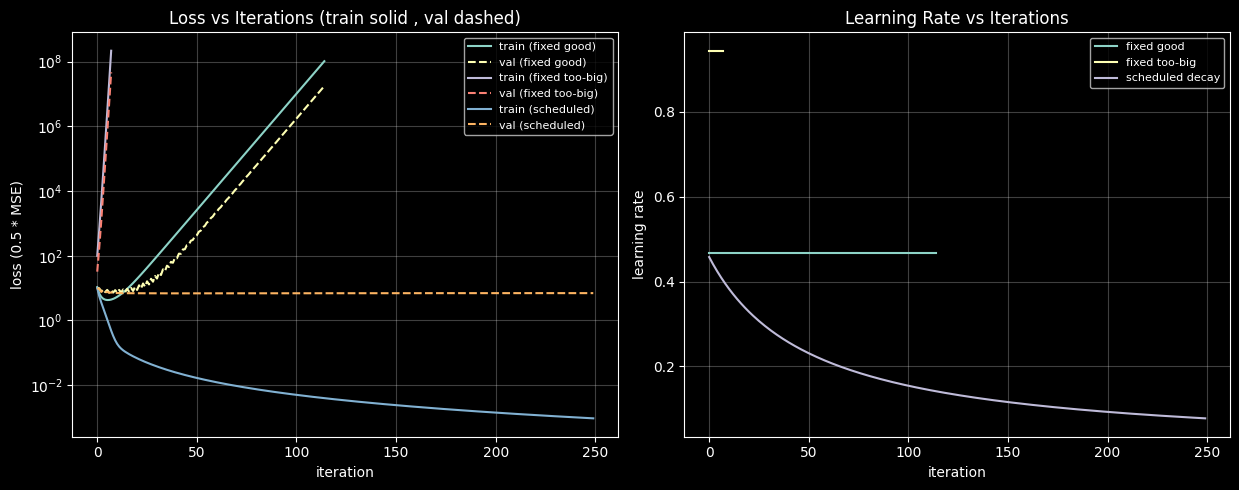

In [20]:
fig , ax = plt.subplots(1 , 2 , figsize = (12.5 , 5))

ax[0].plot(tr_g , label = "train (fixed good)")
ax[0].plot(va_g , "--" , label = "val (fixed good)")
ax[0].plot(tr_b , label = "train (fixed too-big)")
ax[0].plot(va_b , "--" , label = "val (fixed too-big)")
ax[0].plot(tr_s , label = "train (scheduled)")
ax[0].plot(va_s , "--" , label = "val (scheduled)")

ax[0].set_yscale("log")
ax[0].set_title("Loss vs Iterations (train solid , val dashed)")
ax[0].set_xlabel("iteration")
ax[0].set_ylabel("loss (0.5 * MSE)")
ax[0].grid(alpha = 0.25)
ax[0].legend(fontsize = 8)

ax[1].plot(lr_g , label = "fixed good")
ax[1].plot(lr_b , label = "fixed too-big")
ax[1].plot(lr_s , label = "scheduled decay")
ax[1].set_title("Learning Rate vs Iterations")
ax[1].set_xlabel("iteration")
ax[1].set_ylabel("learning rate")
ax[1].grid(alpha = 0.25)
ax[1].legend(fontsize = 8)

plt.tight_layout()
plt.show()